<a href="https://colab.research.google.com/github/Abhishek2104200/Wafer-Defects/blob/main/ResearchPaper1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

# Path to the zip file in Google Drive
zip_path = '/content/drive/MyDrive/LSWMD.pkl.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')  # Extract to the /content directory


In [ ]:
import pandas as pd
df = pd.read_pickle("/content/dataset/LSWMD.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [ ]:
print(df['failureType'].apply(type).unique())  # Check types of elements


[<class 'numpy.ndarray'>]


In [ ]:
# Take a subset for exploratory analysis (e.g., 10,000 rows)
df_subset = df.sample(10000, random_state=42)


In [ ]:
import numpy as np

# Function to normalize wafer maps
def normalize_map(wmap):
    return (np.array(wmap) - np.min(wmap)) / (np.max(wmap) - np.min(wmap))

# Apply normalization to the subset
df_subset['waferMap'] = df_subset['waferMap'].apply(normalize_map)


In [ ]:
print(df_subset['failureType'].head())


552336          []
24803           []
426607          []
722885    [[none]]
192536          []
Name: failureType, dtype: object


In [ ]:
import ast

def clean_failure_type(value):
    try:
        # Convert string to actual Python object (e.g., list)
        parsed_value = ast.literal_eval(value)
        # Handle empty lists
        if isinstance(parsed_value, list) and not parsed_value:
            return "unknown"
        # Extract the first element if it's a nested list
        if isinstance(parsed_value, list) and len(parsed_value) == 1 and isinstance(parsed_value[0], list):
            return parsed_value[0][0]
        # Handle other cases
        return str(parsed_value)
    except (ValueError, SyntaxError):
        # If parsing fails, return as string
        return str(value)


In [ ]:
df_subset['failureType'] = df_subset['failureType'].apply(clean_failure_type)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_subset['failureTypeEncoded'] = label_encoder.fit_transform(df_subset['failureType'])


In [ ]:
print(df_subset[['failureType', 'failureTypeEncoded']].head())
print(df_subset['failureType'].unique())  # Confirm unique values are as expected


       failureType  failureTypeEncoded
552336     unknown                   8
24803      unknown                   8
426607     unknown                   8
722885        none                   7
192536     unknown                   8
['unknown' 'none' 'Center' 'Edge-Ring' 'Loc' 'Scratch' 'Edge-Loc' 'Random'
 'Donut']


In [ ]:
print(df['failureType'].unique())

TypeError: unhashable type: 'numpy.ndarray'

# **Preprocessing**

In [ ]:
wafer_maps = df.iloc[:, 0]

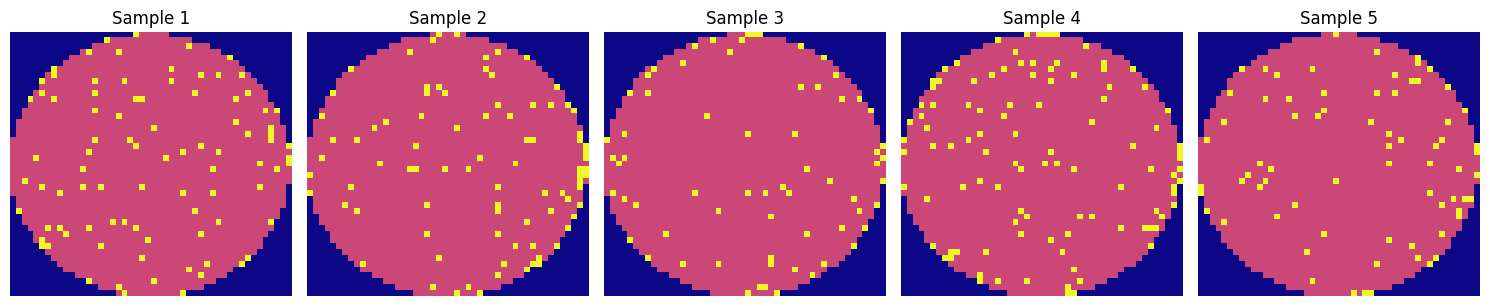

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is a Pandas DataFrame called `data`
# Extract the wafer map column
wafer_maps = df.iloc[:, 0]  # Replace 0 with the column index of wafer maps if it's not the first column

# Visualize the first few wafer maps
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    wafer_map = np.array(wafer_maps.iloc[i])  # Convert to NumPy array
    ax.imshow(wafer_map, cmap='plasma')
    ax.set_title(f"Sample {i+1}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Normalize wafer maps one by one to avoid memory overload
wafer_maps_normalized = []

for idx, wafer in enumerate(wafer_maps):
    wafer_map = np.array(wafer) / 255.0  # Normalize to range [0, 1]
    wafer_maps_normalized.append(wafer_map)
    if idx % 1000 == 0:
        print(f"Normalized {idx} wafer maps...")

# Convert back to a NumPy array after normalization
wafer_maps_normalized = np.array(wafer_maps_normalized)


Normalized 0 wafer maps...
Normalized 1000 wafer maps...
Normalized 2000 wafer maps...
Normalized 3000 wafer maps...
Normalized 4000 wafer maps...
Normalized 5000 wafer maps...
Normalized 6000 wafer maps...
Normalized 7000 wafer maps...
Normalized 8000 wafer maps...
Normalized 9000 wafer maps...
Normalized 10000 wafer maps...
Normalized 11000 wafer maps...
Normalized 12000 wafer maps...
Normalized 13000 wafer maps...
Normalized 14000 wafer maps...
Normalized 15000 wafer maps...
Normalized 16000 wafer maps...
Normalized 17000 wafer maps...
Normalized 18000 wafer maps...
Normalized 19000 wafer maps...
Normalized 20000 wafer maps...
Normalized 21000 wafer maps...
Normalized 22000 wafer maps...
Normalized 23000 wafer maps...
Normalized 24000 wafer maps...
Normalized 25000 wafer maps...
Normalized 26000 wafer maps...
Normalized 27000 wafer maps...
Normalized 28000 wafer maps...
Normalized 29000 wafer maps...
Normalized 30000 wafer maps...
Normalized 31000 wafer maps...
Normalized 32000 wafe

# **Method 2**

In [ ]:
# Sample 1% of the dataset for prototyping
df_small = df.sample(frac=0.01, random_state=42)

# Save the smaller dataset for future use
df_small.to_pickle('/content/drive/MyDrive/LSWMD_small.pkl')

# Verify the size of the smaller dataset
print("Subset size:", len(df_small))


Subset size: 8115


In [ ]:
df_small.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
552336,"[[0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 1, 1, 1, 1, ...",712.0,lot34696,6.0,[],[]
24803,"[[0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 1, 1, ...",776.0,lot2724,2.0,[],[]
426607,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,...",6052.0,lot25655,12.0,[],[]
722885,"[[0, 0, 0, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 0],...",518.0,lot43945,20.0,[[Test]],[[none]]
192536,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,...",6328.0,lot12178,18.0,[],[]


In [ ]:
# Filter dataset for specific failure types (e.g., "Center" and "Donut")
filtered_df = df[df['failureType'].isin(['none'])]

# Check the size of the filtered dataset
print("Filtered dataset size:", len(filtered_df))


Filtered dataset size: 0


In [ ]:
print(filtered_df.head())


Empty DataFrame
Columns: [waferMap, dieSize, lotName, waferIndex, trianTestLabel, failureType]
Index: []


In [ ]:
# Resize all wafer maps to reduce memory usage
import numpy as np

df['waferMap'] = df['waferMap'].apply(lambda x: np.array(x).astype(np.uint8)[::4, ::4])  # Downsample by a factor of 4
